In [1]:
1+1

2

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import scipy
import csv

from src.poisson_process import NHPoissonProcess
from src.mcmc import PoissonMCMC
from src.visualisation import *
from parameters.params import Params
from src.densities import gpd_quantile
from src.rhat_infinity import *


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from IPython.display import display

# Parameters loading


In [4]:
poisson_params_directory = "parameters/poisson_simu/"

poisson_config = "sharkey_poisson_config"
# poisson_config = "tony_poisson_config"
# poisson_config = "negative_xi_config"

poisson_params = Params(poisson_params_directory + poisson_config + ".json")

mcmc_params_directory = "parameters/mcmc/"
mcmc_configs = ["Config1.json", "Config3.json", "Config4.json"]

# mcmc_configs = []
# for filename in os.listdir(mcmc_params_directory):
#     if "json" in filename:
#         mcmc_configs.append(filename)

estimator = "mean"


# Data simulation

Poisson process parameter: (mu = 80, sigma = 15, xi = 0.05)
Orthogonal version: (r = 38.34, nu = 13.12, xi = 0.05)
Expected number of points: 38.34
Number of generated points: 43
Min: 30.924
Max: 114.560

Estimation of quantiles 1/38, 1/76 and 1/115 
Theoretical values of quantiles: 80.000, 90.579, 96.940


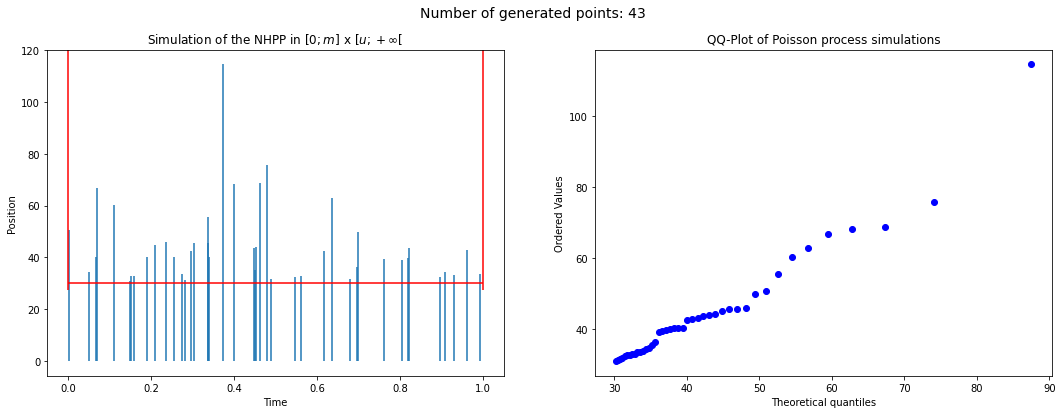

In [5]:
PP = NHPoissonProcess(mu=poisson_params.mu, sig=poisson_params.sigma, xi=poisson_params.xi,
                      u=poisson_params.u, m=poisson_params.m)

lam_obs = PP.get_measure()
n_obs = PP.gen_number_points()[0]

obs = PP.gen_positions(n_obs=n_obs)
times = PP.gen_time_events(n_obs=n_obs)

pp_params = PP.get_parameters()
print("Poisson process parameter: (mu = {}, sigma = {}, xi = {})".format(pp_params[2],
                                                                         pp_params[3],
                                                                         pp_params[4]))
ortho_params = PP.get_orthogonal_reparam()
print("Orthogonal version: (r = {:.2f}, nu = {:.2f}, xi = {})".format(ortho_params[0],
                                                                      ortho_params[1],
                                                                      ortho_params[2]))
print("Expected number of points: {:.2f}".format(lam_obs))
print("Number of generated points:", n_obs)
print("Min: {:.3f}".format(np.min(obs)))
print("Max: {:.3f}".format(np.max(obs)))

quantiles = (1/lam_obs, 1/(2*lam_obs), 1/(3*lam_obs))
print("\nEstimation of quantiles 1/{}, 1/{} and 1/{} ".format(int(lam_obs), int(2*lam_obs), int(3*lam_obs)))
sig_tilde = pp_params[3]+pp_params[4]*(pp_params[0]-pp_params[2])
real_q1 = gpd_quantile(prob=quantiles[0], mu=pp_params[0], sig=sig_tilde, xi=pp_params[4])
real_q2 = gpd_quantile(prob=quantiles[1], mu=pp_params[0], sig=sig_tilde, xi=pp_params[4])
real_q3 = gpd_quantile(prob=quantiles[2], mu=pp_params[0], sig=sig_tilde, xi=pp_params[4])
print("Theoretical values of quantiles: {:.3f}, {:.3f}, {:.3f}".format(real_q1, real_q2, real_q3))

PP.plot_simulation(times=times, positions=obs)


# MCMC


Config file:  Config1.json
Flat Prior on classical parameters with initial m

Choice of m = 1 for MCMC

 Summary:
Multivariate R-hat-infinity on all dependence directions: 1.234 (threshold: 1.043)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,r_threshold,r_hat_infty
mu_m,107.198,25.063,72.396,155.227,6.755,4.881,15.0,17.0,1.20,1.031,1.229
sig_m,28.641,15.543,9.469,57.436,4.231,3.059,15.0,18.0,1.21,1.031,1.237
xi,0.140,0.151,-0.118,0.367,0.038,0.028,16.0,33.0,1.18,1.031,1.165


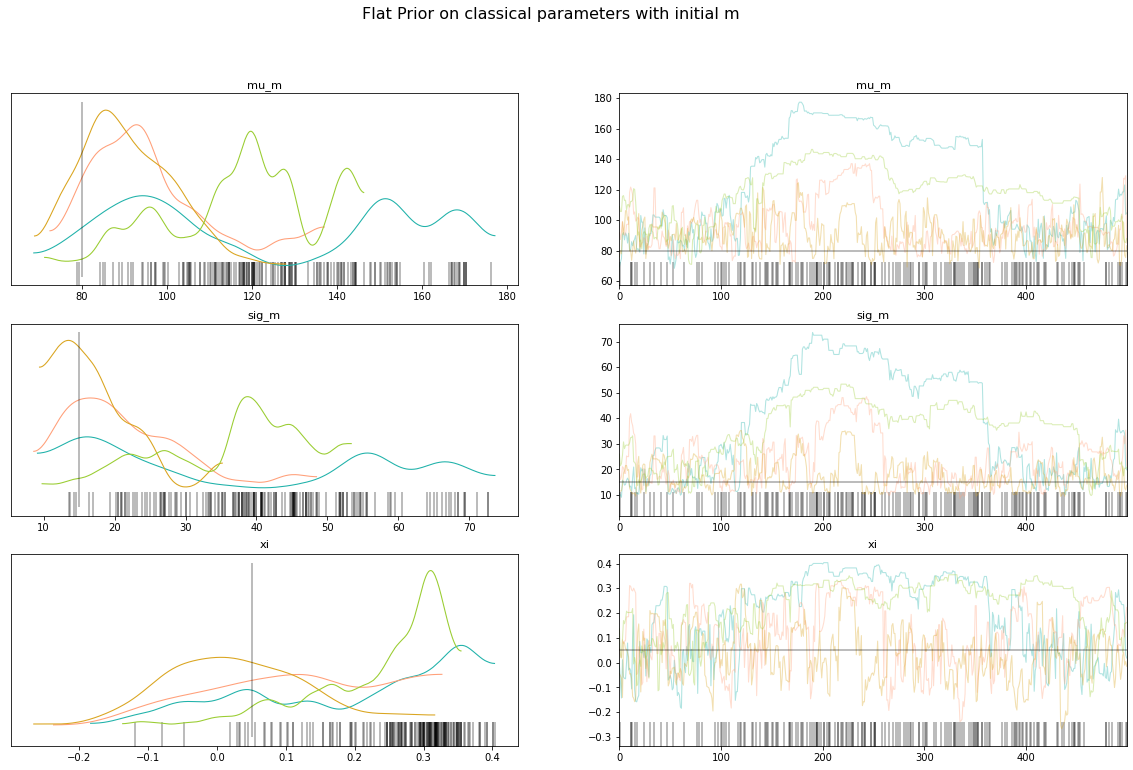


Config file:  Config3.json
Flat Prior on classical parameters with m in [m1;m2]

Choice of m = 45 for MCMC

 Summary:


/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)


Multivariate R-hat-infinity on all dependence directions: 1.010 (threshold: 1.043)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,r_threshold,r_hat_infty
mu_m,103.537,31.083,70.829,154.609,0.964,0.682,1300.0,1122.0,1.00,1.031,1.004
sig_m,28.601,26.489,9.238,64.468,0.917,0.649,892.0,1051.0,1.01,1.031,1.007
xi,0.139,0.181,-0.165,0.470,0.007,0.005,605.0,692.0,1.01,1.031,1.011


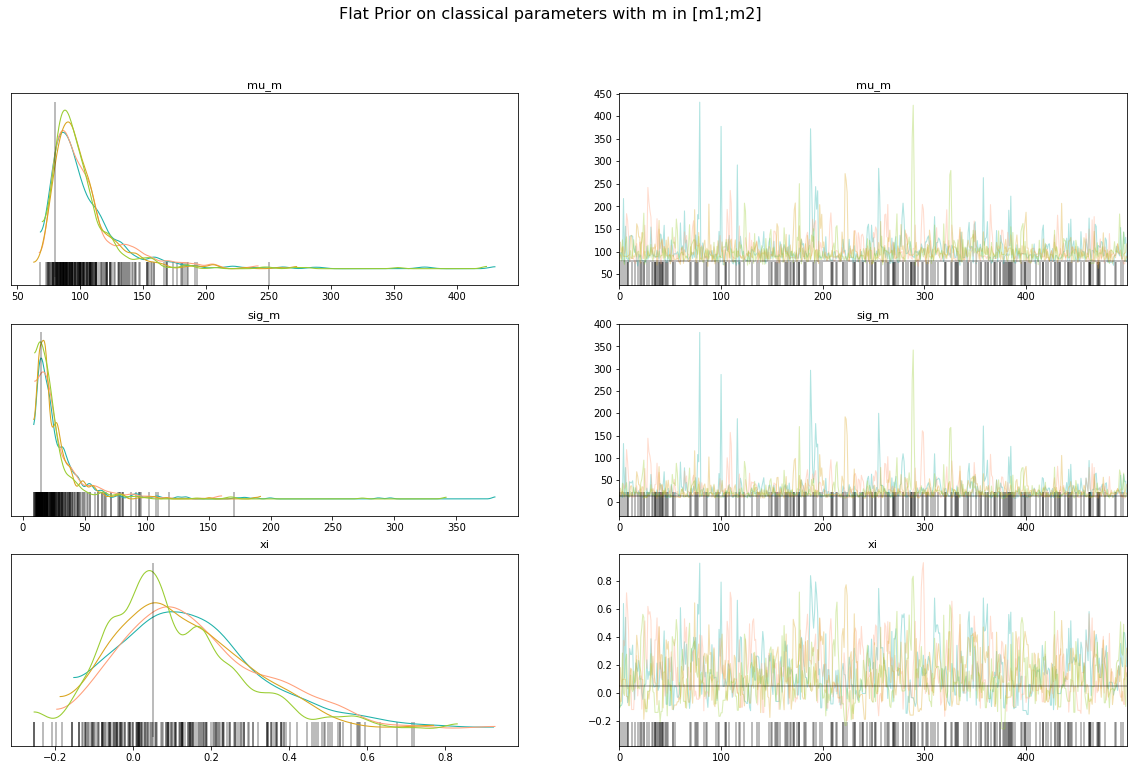


Config file:  Config4.json
Flat Prior on orthogonal parameters

Choice of m = 1 for MCMC

 Summary:


/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)


Multivariate R-hat-infinity on all dependence directions: 1.008 (threshold: 1.043)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,r_threshold,r_hat_infty
r,43.178,6.748,30.313,55.498,0.201,0.146,1172.0,919.0,1.0,1.031,1.005
nu,15.435,2.905,10.600,21.035,0.077,0.055,1406.0,1071.0,1.0,1.031,1.002
xi,0.167,0.202,-0.153,0.556,0.006,0.005,1173.0,842.0,1.0,1.031,1.003


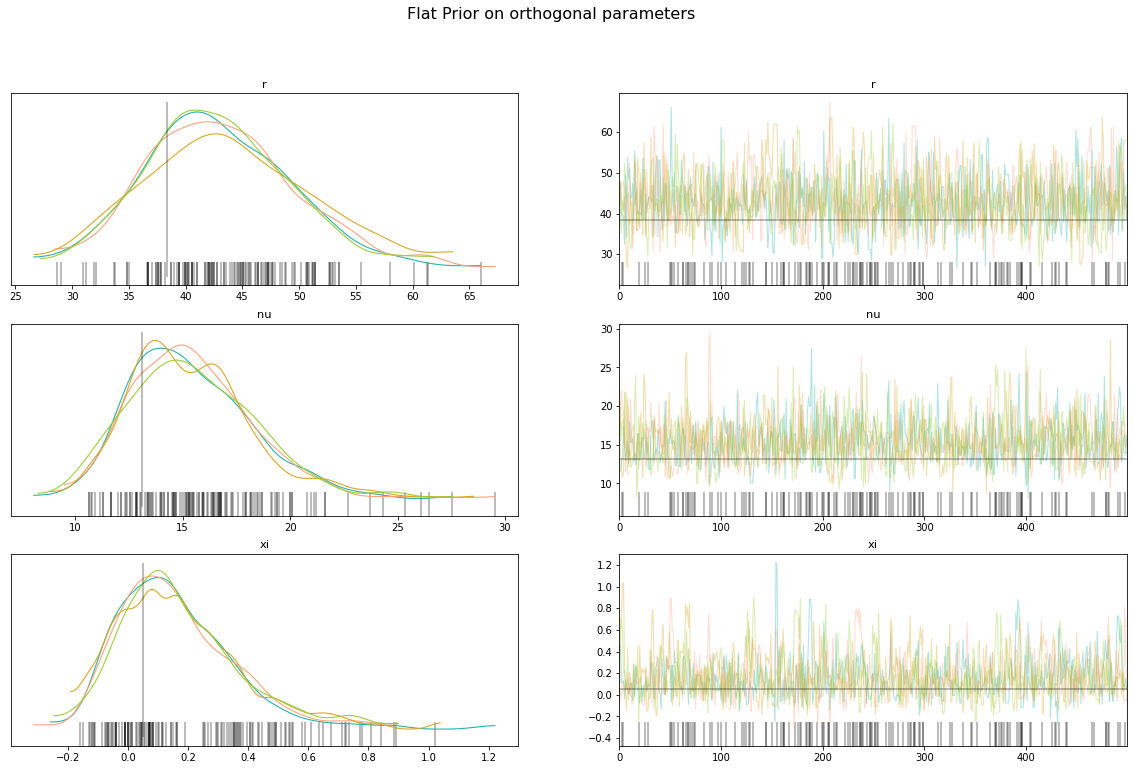

In [6]:
traces = []
traces_orthogonal = []
names = []
names_orthogonal = []


for filename in mcmc_configs:
    print("\nConfig file: ", filename)
    mcmc_params = Params(mcmc_params_directory + filename)
    print(mcmc_params.name)
    print("")
    
    priors = [mcmc_params.priors["p1"],
              mcmc_params.priors["p2"],
              mcmc_params.priors["p3"]]

    if mcmc_params.init_p1_by_u:
        init_val = n_obs if mcmc_params.orthogonal_param else poisson_params.u
        priors[0] = priors[0].replace("u", str(init_val))

    MCMC = PoissonMCMC(priors=priors, step_method=mcmc_params.step_method, niter=mcmc_params.niter,
                       obs=obs, u=poisson_params.u, m=poisson_params.m, quantiles=quantiles,
                       orthogonal_param=mcmc_params.orthogonal_param)
    if mcmc_params.update_m != "":
        MCMC.update_m(update_arg=mcmc_params.update_m, xi=poisson_params.xi)
    print("Choice of m = {} for MCMC".format(MCMC.m))

    trace = MCMC.run(verbose=False)

    names.append(mcmc_params.name)
    traces.append(trace)
    
    print("\n Summary:")
    if MCMC.orthogonal_param:
        display(localrhat_summary(data=trace, var_names=["r", "nu", "xi"]))
        plot_trace(trace, var_names=["r", "nu", "xi"], title=mcmc_params.name, real_value=ortho_params[0:3])
    else:
        display(localrhat_summary(data=trace, var_names=["mu_m", "sig_m", "xi"]))
        plot_trace(trace, var_names=["mu_m", "sig_m", "xi"], title=mcmc_params.name, real_value=pp_params[2:5])
    plt.show()

    

## Autocorrelations, ESS, and $\hat{R}(x)$ on parameters

/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)
/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)
/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)
/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)
/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)
/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  retur

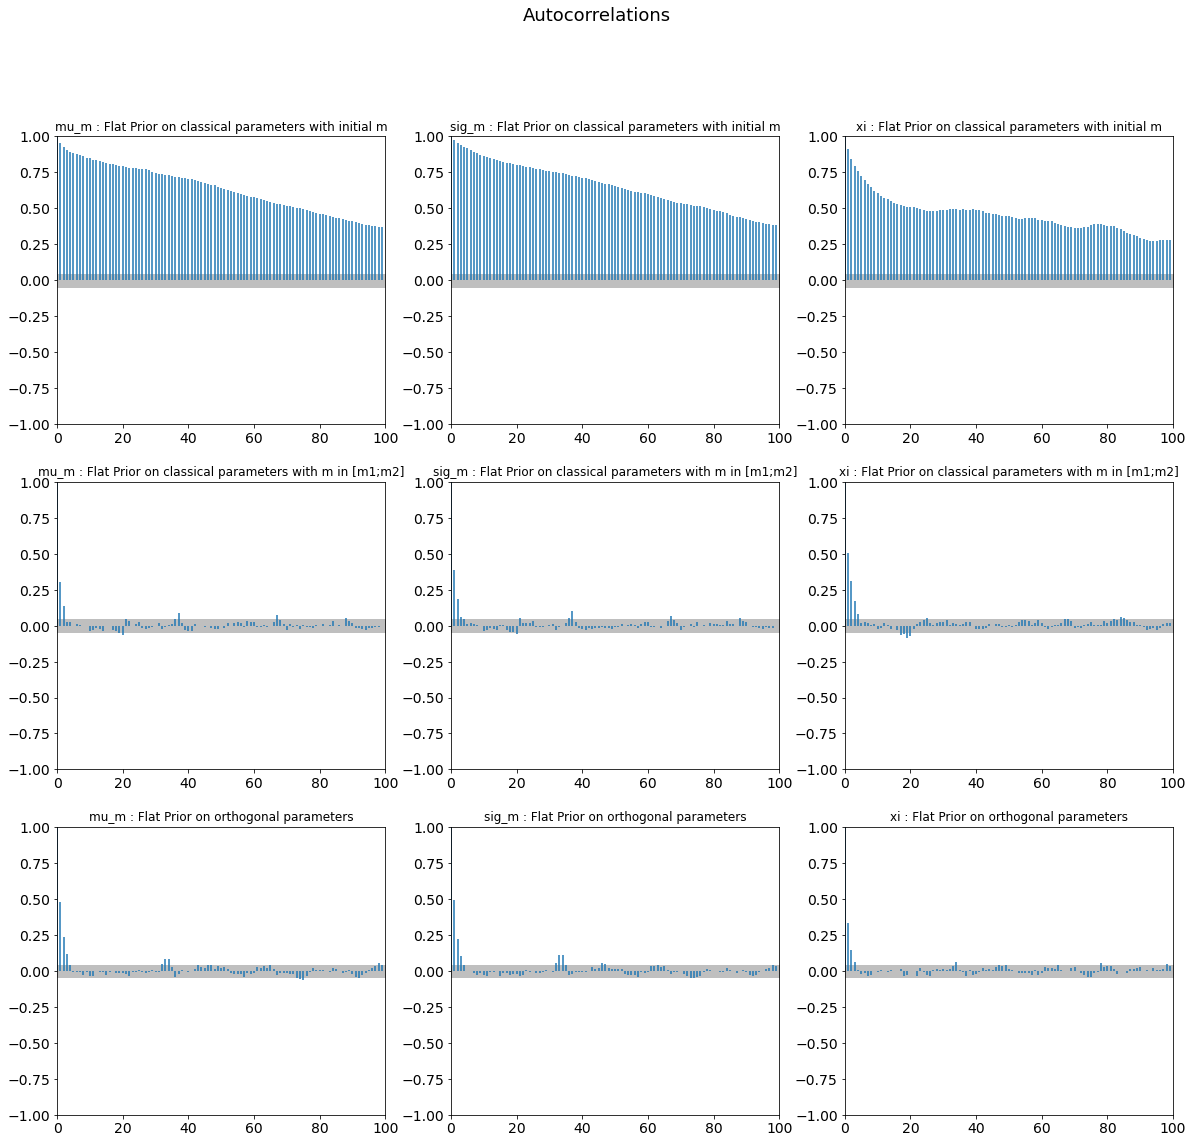

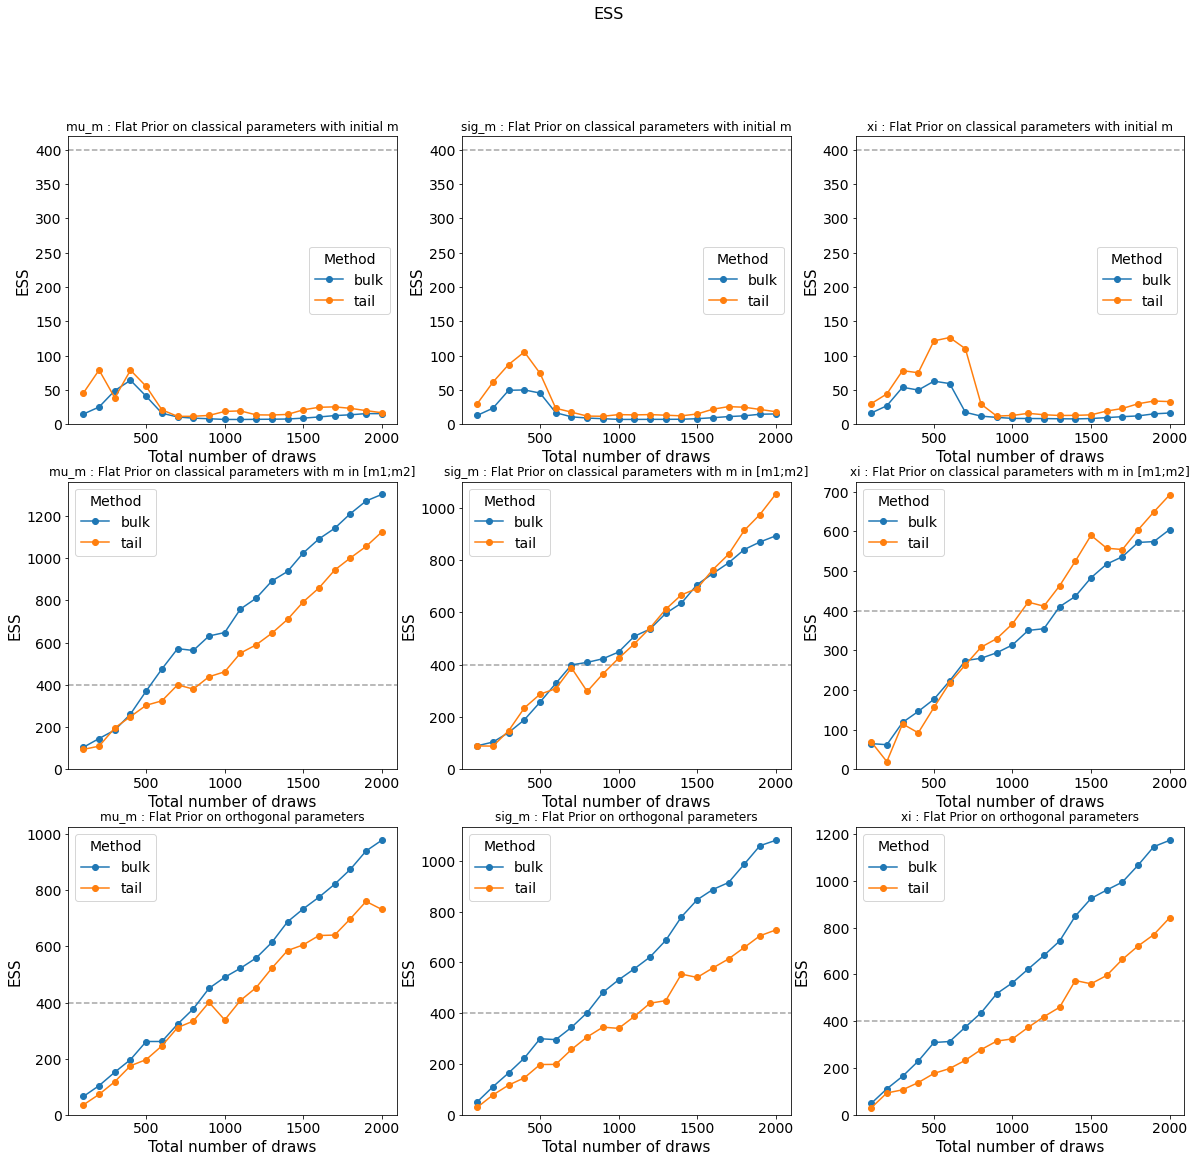

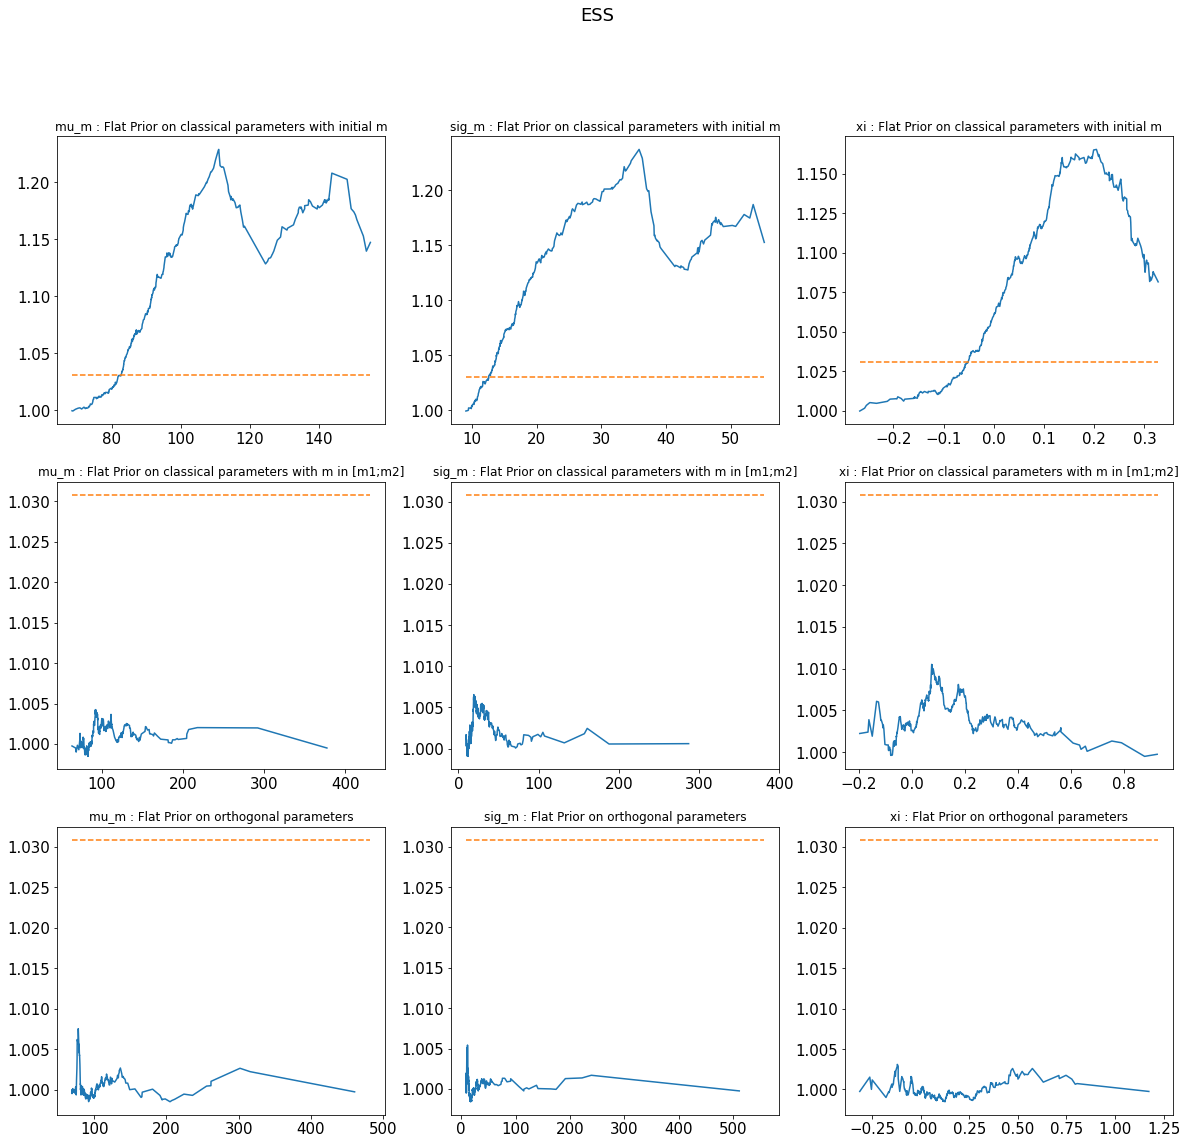

In [7]:
plot_autocorr(traces=traces, labels=names, var_names=["mu_m", "sig_m", "xi"])
plot_ess(traces=traces, labels=names, var_names=["mu_m", "sig_m", "xi"])
plot_r_hat_x(traces=traces, labels=names, var_names=["mu_m", "sig_m", "xi"])
plt.show()